In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_341626/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")

In [3]:
X , y = mnist["data"] , mnist["target"]

### Q1) Use MNIST dataset. Store all the samples in X and labels in y.

Split the dataset in the following ratio.  
 Training : Take the first 70% of samples from  
X and store them in x_train  
 Testing: Take the remaining 30% of samples from  
X and store them in x_test  
  Store the respective labels in y_train,y_test respectively. 

**The last training sample is of digit __?**


In [87]:
rows = int(X.shape[0] * 0.7)
X_train , y_train = X[0:rows] , y[0:rows]
X_test, y_test = X[rows:] , y[rows:]

In [88]:
y_train.tail(1).values

['6']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

### Q2) Build a classifier that differentiates digit 6 from digit 9.
Steps to be followed
1. Collect all digit-6 (Positive class) and digit-9 (Negative class) images from x_train and stack them properly as a single datamatrix x_train_69.
2. Keep all digit-6 images from index 0 to i followed by digit-9 images from index i+1 to n (i denotes the end index of digit-6 images)
3. Similarly, collect the respective labels and store it in a variable y_train_69
4. Set the label values to 1 for positive classes and 0 for negative classes.
5. Load from sklearn.utils import shuffle
6. Shuffle the datamatrix and labels. (Set random_state value to 1729).
7. Create x_test_69 and y_test_69 by repeating the steps from 1 to 6 with required modifications.

**What is the sum of all the labels in the vector y_train_69.**


In [112]:
X_train_69 = pd.concat([X_train[y_train =='6'],X_train[y_train=='9']],axis=0)
X_test_69 = pd.concat([ X_test[y_test == '6'] , X_test[y_test == '9'] ] , axis=0)
y_train_69 = pd.concat([y_train[y_train =='6'],y_train[y_train=='9']],axis=0)
y_test_69 = pd.concat([ y_test[y_test == '6'] , y_test[y_test == '9'] ] , axis=0)

In [90]:
# y_train_69 = y_train_69.replace({'6' : '1' , '9' : '0'})
# y_test_69 = y_test_69.replace({'6' : '1' , '9' : '0'})

In [113]:
y_test_69 = y_test_69.apply(lambda value : '1' if value == '6' else '0')
y_train_69 = y_train_69.apply(lambda value : '1' if value == '6' else '0')

In [114]:
from sklearn.utils import shuffle

X_train_69 , y_train_69 = shuffle(X_train_69 , y_train_69 , random_state=1729)

In [93]:
"Sum is" , y_train_69.value_counts()[1]

/tmp/ipykernel_233785/1406905808.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "Sum is" , y_train_69.value_counts()[1]


('Sum is', 4855)

### Q3) What is the sum of all the labels in the vector y_test_69.

In [94]:
"Sum is" , y_test_69.value_counts()[1]

/tmp/ipykernel_233785/2330364453.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "Sum is" , y_test_69.value_counts()[1]


('Sum is', 2021)

### Q4) Apply StandardScaler to all the training samples in x_train_69 and store the result in another variable (say, x_train_69Tf).

     * What is the mean of the zeroth sample?
     * What is the mean of zeroth feature?
     * What is the standard deviation of the zeroth sample?
     * What is the standard deviation of the zeroth feature?


In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_69tf = scaler.fit_transform(X_train_69)

In [57]:
X_train_69tf[0].mean() , X_train_69tf[:,0].mean() , X_train_69tf[0].std() , X_train_69tf[:,0].std()

(0.08128379559427992, 0.0, 0.735882322603775, 0.0)

### Q5) Train the LogisticRegression model using SGDClassifier() with the following common settings.

1. No Regularization
2. random_state : 10
3. Iteration : 10

Capture the loss for each iteration and plot the iteration vs loss curve. For which of the following settings, the iteration vs loss curve decreased monotonically?

A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `

B.Set learning rate to 0.000001 and fit the model with `x_train_69 ` .

C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples.

D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

In [116]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log_loss' , alpha=0 , max_iter=1 , warm_start=True,learning_rate='constant',eta0=0.01 ,random_state=10)

In [117]:
from sklearn.metrics import log_loss

iterations = 10
loss = []

X_test_69 = scaler.transform(X_test_69)
for i in range(iterations):
    clf.fit(X_train_69tf , y_train_69)
    # y_pred = clf.predict(X_test_69)
    loss.append(log_loss(y_test_69 , y_pred))

/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

#### A

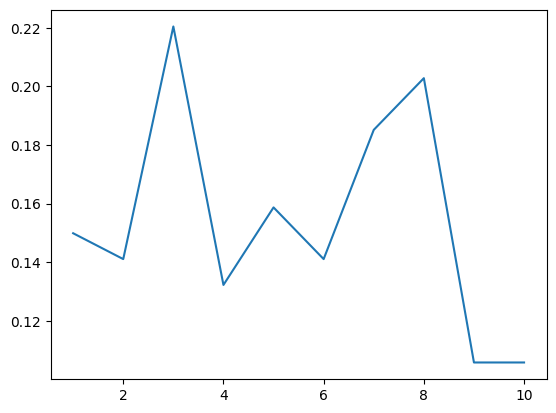

In [100]:
plt.plot(range(1,iterations+1) , loss)

#### B

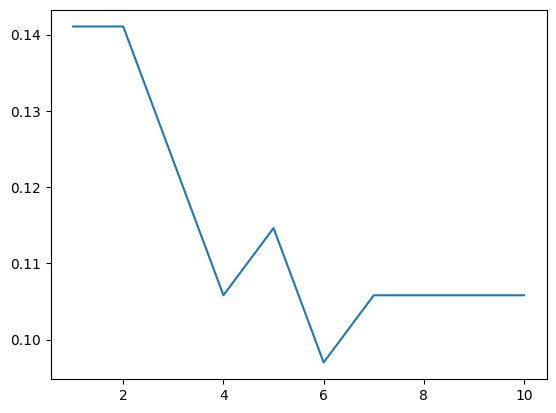

In [103]:
plt.plot(range(1,iterations+1) , loss)

#### C

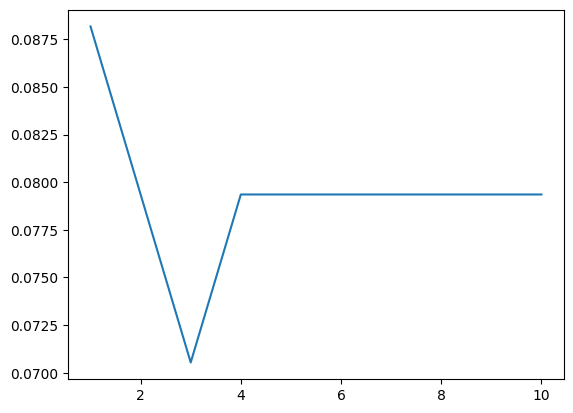

In [118]:
plt.plot(range(1,iterations+1) , loss)

#### D

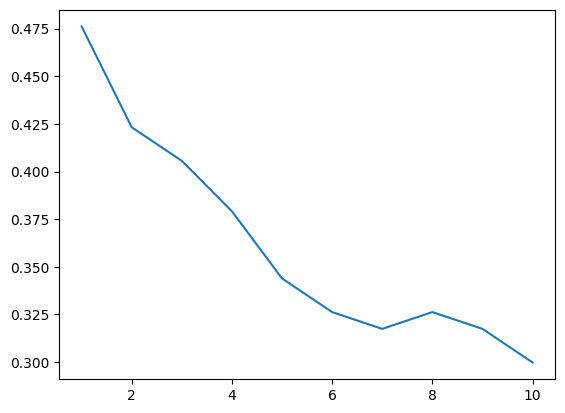

In [106]:
plt.plot(range(1,iterations+1) , loss)